# Import packages

In [472]:
# Import packages - Basics
import pandas as pd
import numpy as np

# Import packages - Plots
from matplotlib import pyplot as plt

# Import packages for Natural Language Processing
import nltk
import nltk.stem
from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Open the data
df=pd.read_csv("un-general-debates.csv")

In [3]:
df.head()

,session,year,country,text
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ..."
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ..."
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...
4,44,1989,ZWE,﻿I should like at the outset to express my del...


# Cleaning

## Processing

In [4]:
# Lowercase
df['text'] = df['text'].str.lower()

# Tokenize, ie. create lists of words
tokenizer = RegexpTokenizer(r'\w+')
df['words']=df['text'].apply(tokenizer.tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['clean_words'] = df['words'].apply(lambda x: [w for w in x if w not in stop_words])

## Dataframes for different countries

In [44]:
# Permanent members of the Council
members = ['FRA', 'GBR', 'USA', 'CHN', 'RUS']
df_members = df[df['country'].isin(members)]

df_members_countries = []
for member in members :
    df_members_countries.append(df[df['country'] == member])

In [119]:
df_by_countries = df_members.groupby('country').agg({'clean_words': 'sum'})
#df_by_countries.reset_index(inplace=True)

# Analysis of word frequencies

## Most used words by country

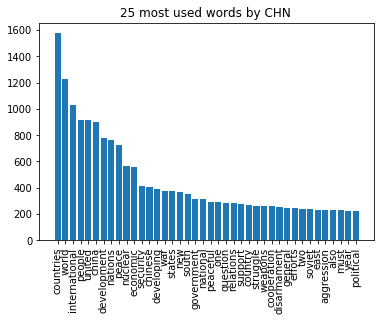

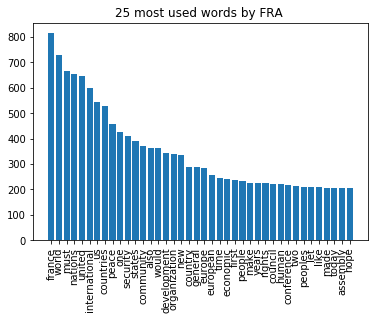

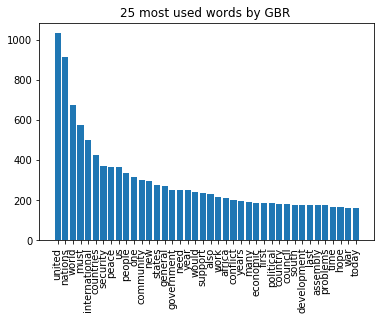

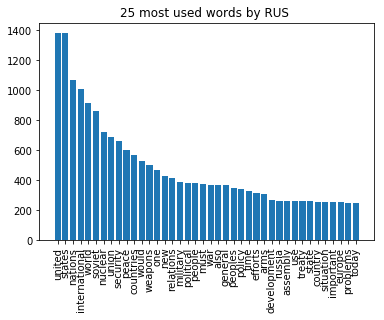

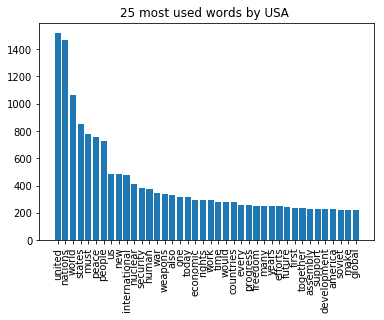

In [120]:
# Most used words by country: quite similar
for i, row in df_by_countries.iterrows():
    freq = dict(nltk.FreqDist(row['clean_words']))
    sort_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)[0:40]
    plt.bar(range(len(sort_freq)), [val[1] for val in sort_freq], align='center')
    plt.xticks(range(len(sort_freq)), [val[0] for val in sort_freq])
    plt.xticks(rotation=90)
    plt.title("40 most used words by %s " % str(i))
    plt.show()

## Most used words in France: evolution over time

Evolution over time of word frequency for France, per decade. We plot the evolution of the 30 most used words in France, per decade, and create lists of the words that have been in the top 30 at a decade, and of the words that have been in the top 10 at a year.

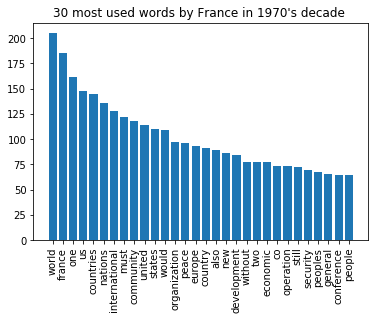

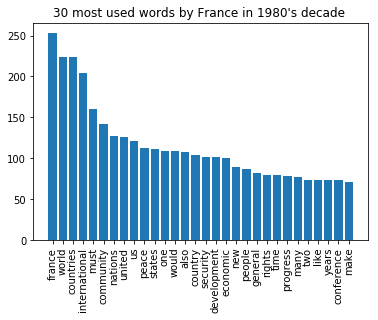

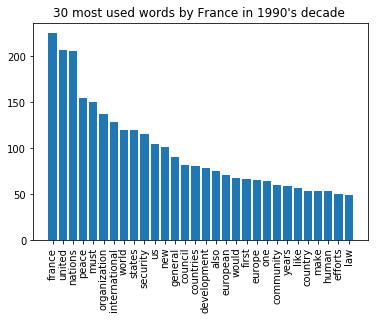

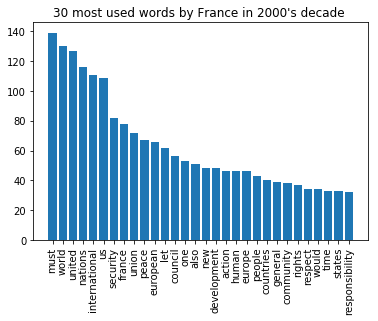

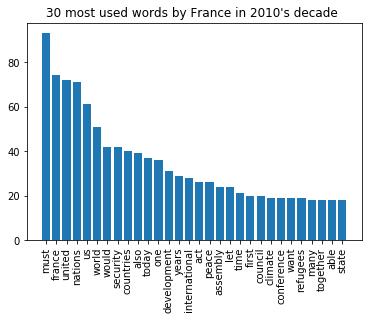

In [260]:
#Evolution over time in France, by decade
freq_decade_words = pd.DataFrame()
freq_year_words = pd.DataFrame()
df_france_decade = df_france.groupby((df_france.year//10)*10).agg({'clean_words': 'sum'}).sort_values(by=['year'])

for i, row in df_france_decade.iterrows():
    freq = dict(nltk.FreqDist(row['clean_words']))
    sort_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)[0:30]
    #sort_freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1], reverse=True)[0:40]}
    #print(sort_freq.keys())
    plt.bar(range(len(sort_freq)), [val[1] for val in sort_freq], align='center')
    plt.xticks(range(len(sort_freq)), [val[0] for val in sort_freq])
    plt.xticks(rotation=90)
    plt.title("30 most used words by France in %s's decade " % str(i))
    plt.show()
    freq_decade_words = freq_decade_words.append(pd.DataFrame(sort_freq, columns=['words', 'freq']))
    
for i, row in df_france.iterrows():
    freq = dict(nltk.FreqDist(row['clean_words']))
    sort_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)[0:10]
    freq_year_words = freq_year_words.append(pd.DataFrame(sort_freq, columns=['words', 'freq']))

# Words that have been in top 30 at a decade
freq_decade_words = set(freq_decade_words['words'])
# Words that have been in top 10 at a year
freq_year_words = set(freq_year_words['words'])

In [493]:
# Creation of df of frequencies
def create_freq_df(list_words) :
    output_df = {}
    for i, speech in df_france.iterrows():
        year = speech['year']
        for token in speech['clean_words']:
            if token in list_words :
                if token not in output_df:
                    output_df[token] = {"total_freq":1, year:1}
                else:
                    output_df[token]["total_freq"] += 1
                    if not output_df[token].get(year):
                        output_df[token][year] = 1
                    else:
                        output_df[token][year] += 1
    output_df = pd.DataFrame.from_dict(output_df, orient='index').drop(columns=['total_freq']).sort_index(axis=1).transpose()
    return output_df
                        
freq_decade_df = create_freq_df(freq_decade_words)
freq_year_df = create_freq_df(freq_year_words)

In [495]:
#List of words that have been in the top 10 most used words during a year for France
freq_year_words

{'action',
 'africa',
 'also',
 'appeal',
 'arab',
 'assembly',
 'cannot',
 'charter',
 'chemical',
 'co',
 'community',
 'conference',
 'continue',
 'council',
 'countries',
 'country',
 'crisis',
 'daesh',
 'detente',
 'development',
 'disarmament',
 'economic',
 'efforts',
 'energy',
 'ensure',
 'europe',
 'european',
 'fight',
 'first',
 'france',
 'freedom',
 'general',
 'government',
 'group',
 'hope',
 'human',
 'international',
 'iraq',
 'israel',
 'justice',
 'last',
 'law',
 'let',
 'made',
 'many',
 'may',
 'member',
 'mr',
 'must',
 'nations',
 'need',
 'new',
 'nothing',
 'one',
 'operation',
 'order',
 'organization',
 'peace',
 'people',
 'peoples',
 'refugees',
 'right',
 'rights',
 'rules',
 'says',
 'secretary',
 'security',
 'shall',
 'situation',
 'solidarity',
 'south',
 'soviet',
 'state',
 'states',
 'terrorism',
 'today',
 'together',
 'twelve',
 'two',
 'union',
 'united',
 'us',
 'wait',
 'want',
 'war',
 'weapons',
 'without',
 'world',
 'would',
 'years'}

In [497]:
#List of words that have been in the top 30 most used words during a decade for France
freq_decade_words

{'able',
 'act',
 'action',
 'also',
 'assembly',
 'climate',
 'co',
 'community',
 'conference',
 'council',
 'countries',
 'country',
 'development',
 'economic',
 'efforts',
 'europe',
 'european',
 'first',
 'france',
 'general',
 'human',
 'international',
 'law',
 'let',
 'like',
 'make',
 'many',
 'must',
 'nations',
 'new',
 'one',
 'operation',
 'organization',
 'peace',
 'people',
 'peoples',
 'progress',
 'refugees',
 'respect',
 'responsibility',
 'rights',
 'security',
 'state',
 'states',
 'still',
 'time',
 'today',
 'together',
 'two',
 'union',
 'united',
 'us',
 'want',
 'without',
 'world',
 'would',
 'years'}

## Evolution over time of some words in France

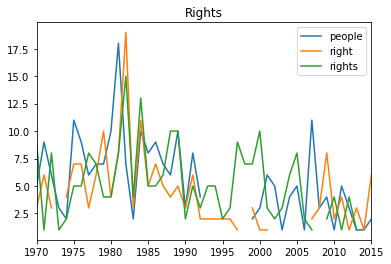

In [501]:
freq_year_df[['people', 'right', 'rights']].plot(title = "Rights")

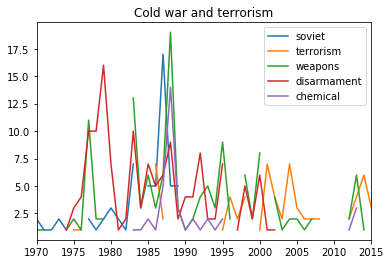

In [499]:
#Terrorism: mostly after cold war
freq_year_df[['soviet', 'terrorism', 'weapons', 'disarmament', 'chemical']].plot(title = "Cold war and terrorism")

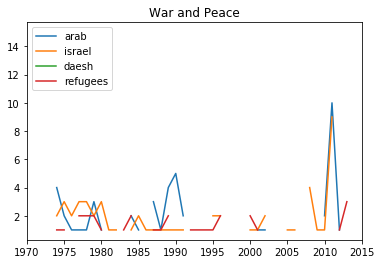

In [483]:
freq_year_df[['arab', 'israel', 'daesh', 'refugees']].plot(title = "War and Peace")

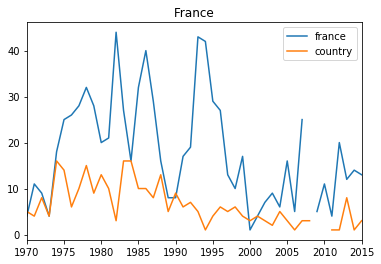

In [503]:
#France mostly important before 2000
freq_year_df[['france', 'country']].plot(title = "France")